Accuracy: 1.0
Confusion Matrix:
 [[2 0]
 [0 2]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



C:\Python\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


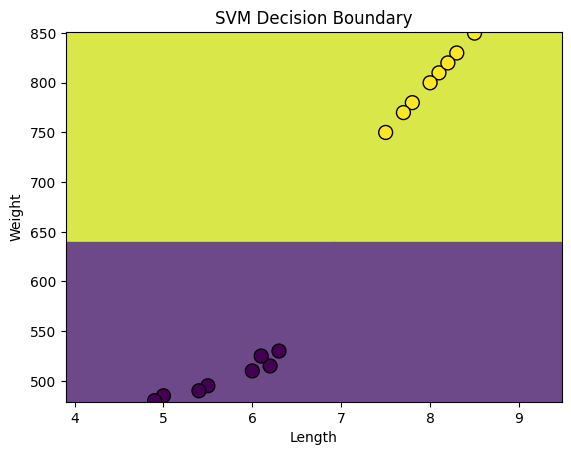

Predicted Type: Alligator


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Creating a hypothetical dataset
data = {
    'Length': [5.2, 5.8, 6.0, 4.9, 5.5, 6.3, 6.1, 5.4, 5.0, 6.2, 8.0, 7.5, 8.5, 7.8, 8.2, 7.9, 8.1, 7.6, 8.3, 7.7],
    'Weight': [500, 520, 510, 480, 495, 530, 525, 490, 485, 515, 800, 750, 850, 780, 820, 790, 810, 760, 830, 770],
    'Type': ['Crocodile', 'Crocodile', 'Crocodile', 'Crocodile', 'Crocodile', 'Crocodile', 'Crocodile', 'Crocodile', 'Crocodile', 'Crocodile',
             'Alligator', 'Alligator', 'Alligator', 'Alligator', 'Alligator', 'Alligator', 'Alligator', 'Alligator', 'Alligator', 'Alligator']
}

# Convert the data to a DataFrame
df = pd.DataFrame(data)

# Encode the target variable
df['Type'] = df['Type'].apply(lambda x: 1 if x == 'Alligator' else 0)

# Define features and target variable
X = df[['Length', 'Weight']]
y = df['Type']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the SVM classifier
svm = SVC(kernel='linear')

# Train the classifier
svm.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

# Visualize the decision boundary
def plot_decision_boundary(X, y, model):
    # Create a mesh grid
    h = .02  # step size in the mesh
    x_min, x_max = X['Length'].min() - 1, X['Length'].max() + 1
    y_min, y_max = X['Weight'].min() - 1, X['Weight'].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Predict class using data and reshape it
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X['Length'], X['Weight'], c=y, edgecolors='k', marker='o', s=100)
    plt.xlabel('Length')
    plt.ylabel('Weight')
    plt.title('SVM Decision Boundary')
    plt.show()

# Plot the decision boundary
plot_decision_boundary(X_train, y_train, svm)

# Example new data point
new_data = pd.DataFrame({
    'Length': [7.0],
    'Weight': [760]
})

# Ensure the new data point has the same feature names as the training data
new_data.columns = X.columns

# Predict the type for the new data point
prediction = svm.predict(new_data)
animal_type = 'Alligator' if prediction == 1 else 'Crocodile'
print("Predicted Type:", animal_type)
